In [6]:
%run BikeSharing.ipynb

Loaded file!


## Models

In [7]:
y = target.copy()

display(y.head())
display(dataSet.head())

instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,date
instant,,,,,,,,,,,,,,
1,2011-01-01,1,0,0,0,6,0,1,0.24,0.81,0.0,3,13,52
2,2011-01-01,1,0,1,0,6,0,1,0.22,0.80,0.0,8,32,52
3,2011-01-01,1,0,2,0,6,0,1,0.22,0.80,0.0,5,27,52
4,2011-01-01,1,0,3,0,6,0,1,0.24,0.75,0.0,3,10,52
5,2011-01-01,1,0,4,0,6,0,1,0.24,0.75,0.0,0,1,52


In [8]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.10, random_state=42)

#### Sk Learn Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
regr = LinearRegression()

try: 
    dates = X_train.pop('dteday')
    dates_test = X_test.pop('dteday')
except:
    print("Popped")

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
print(regr.coef_)

# Calculate adjusted R 

print(regr.score(X_train, y_train)) 

1.0
[ 1.38868912e-14 -2.13162821e-14  5.48042514e-15  4.28558488e-14
 -1.17581726e-16  1.65490018e-13  4.65675675e-15 -1.68553973e-13
  3.34472033e-14  4.37858300e-14  1.00000000e+00  1.00000000e+00
 -5.55111512e-16]
1.0


#### Stats model OLS regression

In [11]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.214e+32
Date:                Thu, 10 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:05:56   Log-Likelihood:                      4.1763e+05
No. Observations:               15641   AIC:                                 -8.352e+05
Df Residuals:                   15628   BIC:                                 -8.351e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### R^2 of 1, DW != 2, very significant t-tests for casual and registered - Something is wrong!

## Understanding linear regressions assumptions

#### Since casual + registered = cnt (target), trying the regression by dropping both of them

In [14]:
X_train = X_train.drop(axis = 1, columns = ['casual', 'registered'])
X_test = X_test.drop(axis = 1, columns = ['casual', 'registered'])

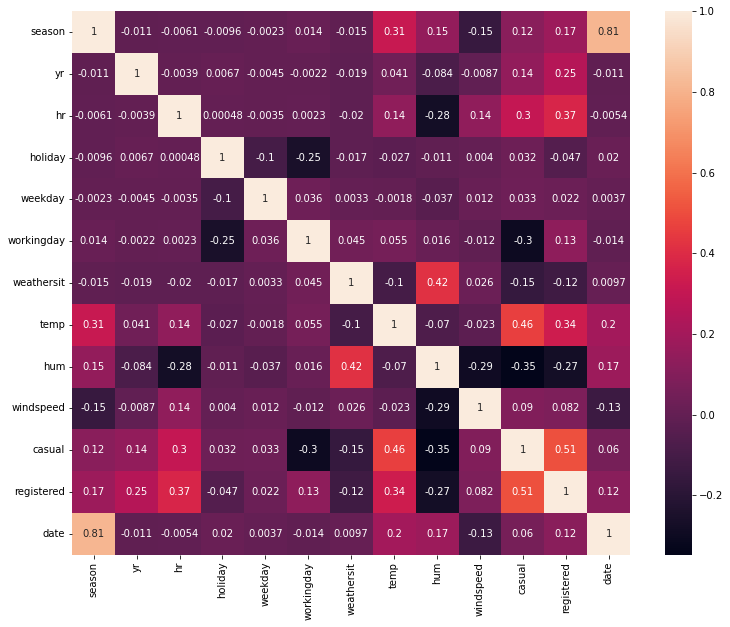

In [15]:
plt.figure(figsize = (12.5, 10))
sns.heatmap(dataSet.corr(),annot= True)
plt.show()

In [16]:
# Dropping season because of high corelation with date
X_train = X_train.drop(axis = 1, columns = ['season'])
X_test = X_test.drop(axis = 1, columns = ['season'])

In [17]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              3734.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:13:50   Log-Likelihood:                         -99811.
No. Observations:               15641   AIC:                                  1.996e+05
Df Residuals:                   15631   BIC:                                  1.997e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Looks better with reasonable R^2 and DW = 2 with almost all significant t-tests and F-test significant as a whole

#### Distribution of error terms

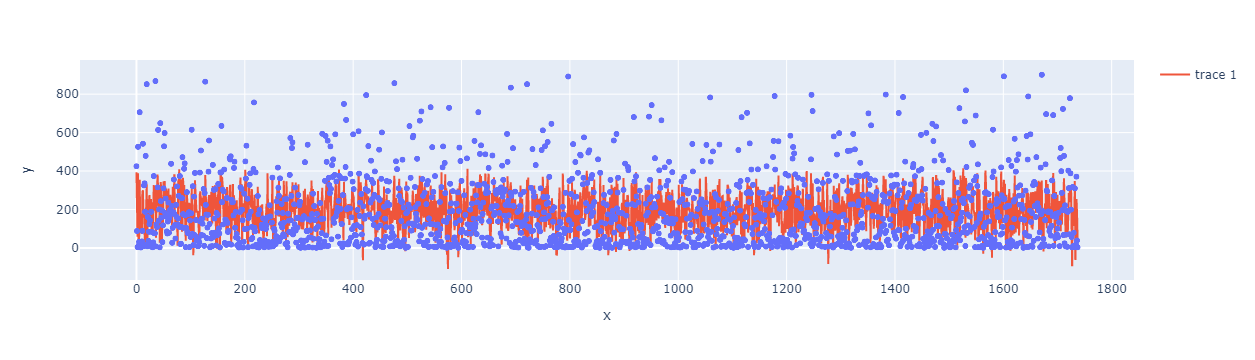

Mean =  1.9374086155680325e-17
St_Dev =  1.0


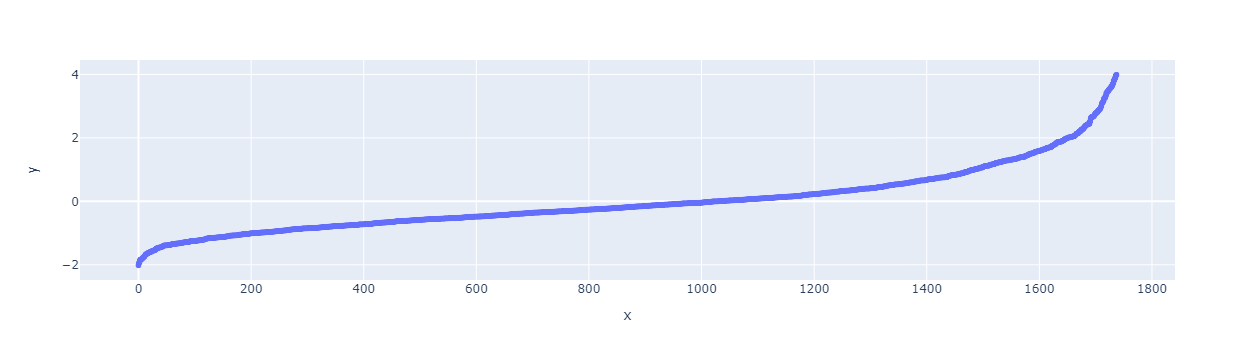

In [31]:
# Checking for normal distributions of error terms
import plotly.express as px
import statistics

def standardize(errors):
    mean = statistics.mean(errors)
    st_dev = statistics.stdev(errors)
    
    # Z score
    normalized = [ (i - mean)/st_dev for i in errors]
    print("Mean = ", statistics.mean(normalized)) # CLose to 0
    print("St_Dev = ", statistics.stdev(normalized)) # equal to 1
    return sorted(normalized)

y_pred = est2.predict(X_test)

fig = px.scatter(y = y_test, x = [i for i in range(len(X_test))])
fig.add_scatter(y = y_pred, x = [i for i in range(len(X_test))])
fig.show()

errors =  y_test - y_pred
fig = px.scatter( y = standardize(errors), x = [i for i in range(len(X_test))])
fig.show()

Mean =  1.9374086155680325e-17
St_Dev =  1.0


c:\users\jasmeet singh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



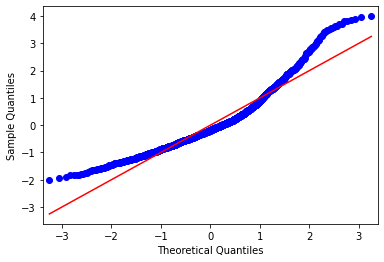

In [32]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

errors =  y_test - y_pred
data = standardize(errors)
                                  
# q-q plot
qqplot(np.asarray(data), line='s')
pyplot.show()

In [33]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

errors =  y_test - y_pred
data = standardize(errors)
                                  
# q-q plot
data = np.asarray(data)
       
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
### Since mean = 0 and variance = 1, we "CAN" still proceed (Markov Assumptions)

Mean =  1.9374086155680325e-17
St_Dev =  1.0
Statistics=0.925, p=0.000
Sample does not look Gaussian (reject H0)


#### Multi colinearity

In [34]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

      feature       VIF
0          yr  1.937465
1          hr  3.726632
2     holiday  1.089253
3     weekday  2.977402
4  workingday  3.112270
5  weathersit  4.685872
6        temp  6.640679
7   windspeed  3.189802
8        date  4.019017


In [35]:
try:
    X_train = X_train.drop(axis = 1, columns = ['hum'])
    X_test = X_test.drop(axis = 1, columns = ['hum'])
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                              for i in range(len(X_train.columns))]
    print(vif_data)
except:
    print("Humidity dropped")
    
# try:
#     X_train = X_train.drop(axis = 1, columns = ['temp'])
#     X_test = X_test.drop(axis = 1, columns = ['temp'])
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X_train.columns

#     # calculating VIF for each feature
#     vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
#                               for i in range(len(X_train.columns))]
#     print(vif_data)
# except:
#     print("Temperature dropped")
    
print("Final DataSet: \n", vif_data)

Humidity dropped
Final DataSet: 
       feature       VIF
0          yr  1.937465
1          hr  3.726632
2     holiday  1.089253
3     weekday  2.977402
4  workingday  3.112270
5  weathersit  4.685872
6        temp  6.640679
7   windspeed  3.189802
8        date  4.019017


### Heteroskedasticity

In [36]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']
test = sms.het_breuschpagan(est2.resid, est2.model.exog)

result = lzip(names, test)
if( result[1][1] < 0.05):
    print("Heteroskedasticity absent")
else:
    print("Heteroskedasticity present")
print(result)

Heteroskedasticity absent
[('Lagrange multiplier statistic', 4528.913579277121), ('p-value', 0.0)]


#### Auto-corelation of error terms

Since the regression table has DW statistic = 2, this means no autocorelation of error terms

### Running regression again to check impact on R2

In [37]:
# Running regression again
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              3756.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:29:16   Log-Likelihood:                     -1.0035e+05
No. Observations:               15641   AIC:                                  2.007e+05
Df Residuals:                   15632   BIC:                                  2.008e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<AxesSubplot:>

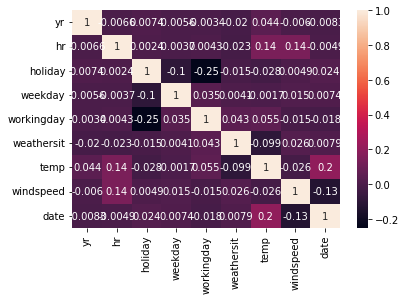

In [38]:
sns.heatmap(X_train.corr(), annot = True)

### MSE Errors Metrics

In [39]:
#MSE - Diff / DF
print(est2.mse_model)
#RSS - Residuals / DFResiduals
print(est2.mse_resid)
#F-test = MSE / RSS

# Diff / n
print(est2.mse_total)

82293974.17961025
21910.492667829305
69250.72495364747
